# Regresión Lineal para proyectar ingresos futuros

## Primer paso: entrenamiento del modelo

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# carga de datos

df = pd.read_csv("ingresos_historicos.csv") 

# convertir fecha a número

df["fecha"] = pd.to_datetime(df["fecha"])
df = df.sort_values("fecha")
df["mes_num"] = (df["fecha"].dt.year - df["fecha"].dt.year.min())*12 + df["fecha"].dt.month

X = df[["mes_num"]]
y = df["ingresos"]

# entrenamiento del modelo

modelo = LinearRegression()
modelo.fit(X, y)

# proyección de los ingresos a los próximos 6 meses

ultimo_mes = df["mes_num"].max()
proyeccion_meses = np.array([ultimo_mes + i for i in range(1, 7)]).reshape(-1, 1)
predicciones = modelo.predict(proyeccion_meses)

# resultados

proyecciones_df = pd.DataFrame({
    "mes_num": proyeccion_meses.flatten(),
    "ingreso_proyectado": predicciones
})

print("Proyección a 6 meses:")
print(proyecciones_df)


Proyección a 6 meses:
   mes_num  ingreso_proyectado
0       37        31303.222222
1       38        31608.695195
2       39        31914.168168
3       40        32219.641141
4       41        32525.114114
5       42        32830.587087


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Segundo paso: preparación del gráfico

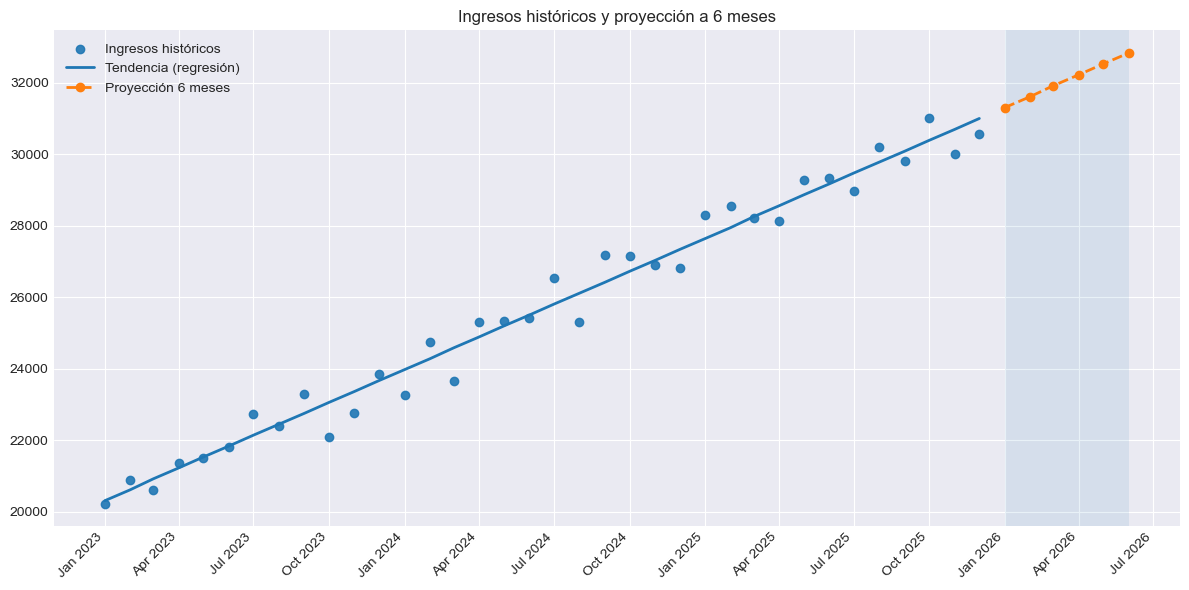

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.offsets import MonthBegin
import pandas as pd

# predicción sobre todo el histórico

X_hist = df[["mes_num"]]
y_hist_pred = modelo.predict(X_hist)

# info del último mes histórico

ultimo_mes_num = df["mes_num"].max()
ultima_fecha = df["fecha"].max()

# creo los próximos 6 meses

n_futuro = 6
fechas_futuras = [ultima_fecha + MonthBegin(i) for i in range(1, n_futuro + 1)]
meses_futuros = pd.DataFrame({
    "mes_num": [ultimo_mes_num + i for i in range(1, n_futuro + 1)]
})
ingresos_futuros = modelo.predict(meses_futuros)

# armo los dataframes para el gráfico

hist_real = pd.DataFrame({
    "fecha": df["fecha"],
    "ingresos": df["ingresos"]
})

hist_tendencia = pd.DataFrame({
    "fecha": df["fecha"],
    "ingresos": y_hist_pred
})

future_df = pd.DataFrame({
    "fecha": fechas_futuras,
    "ingresos": ingresos_futuros
})

# gráfico

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(12, 6))

# puntos reales históricos

plt.scatter(hist_real["fecha"], hist_real["ingresos"],
            alpha=0.9, label="Ingresos históricos")

# línea de tendencia

plt.plot(hist_tendencia["fecha"], hist_tendencia["ingresos"],
         linewidth=2, label="Tendencia (regresión)")

# proyección futura

plt.plot(future_df["fecha"], future_df["ingresos"],
         linewidth=2, linestyle="--", marker="o", label="Proyección 6 meses")

# sombreado de la zona futura

plt.axvspan(future_df["fecha"].min(), future_df["fecha"].max(), alpha=0.1)

# formateo el eje X

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")

# etiquetas y título

plt.title("Ingresos históricos y proyección a 6 meses")
plt.legend()

plt.tight_layout()
plt.show()
